In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Discussion Question

## Discussion Question 1
Suppose we have the following data:
1. A population of income
    * `mean` = 10k
    * `SD` = 20k
2. Sample size is 100, chosen uniformly at random with replacement

#### What's the chance that the sample average is above 14k?

We expect that the sample should have an average income of around 10k as well, but it could be greater or lower. 

Recall the formula
\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

This means if we go to population and take a bunch of samples of size `100`, take the `mean` of every single sample and plot the histogram, the histogram will resemble a bell shape due to Central Limit Theorem. It will be centered at 10k (since that's the population `mean`) and it will have a `SD` that can be calculated with the formula above. 

\begin{equation*}
sample`mean`SD = \frac{20,000}{\sqrt{100}} = 2,000
\end{equation*}

2,000 is 1 `SD` away from the center, on either direction. This means 14k is 2 `SD` above the population `mean`.

If the distribution is roughly normal, in the area within 2 `SD` we will have 95% of the histogram. Thus between 6k to 14k, 95% of the distribution is within the 2 boundaries. From there, we can estimate that **about 2.5% are above 14k** and **about 2.5% are below 6k**. 

Thus, **the chance that the sample average is above 14k is about 2.5%**.

However, if we assume Chebyshev's inequality, instead of 95%, 75% of the distribution is within the 2 boundaries. In this case, **about 12.5% are above 14k** and **about 12.5% are below 6k**.

In this case, we happened to know that we take the `mean` of a relatively large random samples from the population. Because of this, we can use **normal distribution** as a better guess.


## Discussion Question 2
Suppose we have the following data:
1. The population is a perfect bell shape.
    * `mean` = 10
    * `SD` = 20
2. The `sample size` is 100 chosen uniformly at random with replacement.

#### What's the chance that every single value in the sample is below 50?

Hint: try solving an easier problem. Suppose we pick a sample of size `1`. What's the chance that that one person has a value of below `50`?

We know that `50` is 2 population `SD` above the population `mean`. This means between `-30` and `50`, we have 95% of the entire distribution since the population is a perfect bell shape. What are the chance that we draw one person that has `50` or below?

If we go from `50` to `-30`, that's `95%` are of the distribution. If we keep going lower than `-30`, that's another `2.5%` of the area. `95%` + `2.5%` = `97.5%`

This means the chance of drawing one value below `50` is **97.5%**.

Now if we draw `100` people and we want all `100` of them to be `50` or below, the chance would be:
\begin{equation*}
Chance = {0.975}^{100}
\end{equation*}




In [2]:
0.975 ** 100

0.07951728986183142

It's about 8% chance! Even thought the chance of each person obtaining `50` or below is as high as `97.5%`, in a sample of `100`, chances are at least one person within that `100` got greater than `50`. 

Back in **Discussion Question 1**, we asked question about the entire sample. "What are the chances that the average of all `100` people is about 14k?". Due to Central Limit Theorem, we happen to know that the distribution of the sample average is approximately normal. 

In **Discussion Question 2**, we're not looking at the distribution of the sample average. We're looking at each individual person. This is why the statement "A perfect bell shape" is helpful. Otherwise, we won't know what the population looks like, and we won't be able to make any conclusion. 

If we didn't know the shape of the distribution, we would have to use Chebyshev's inequality. 

## Discussion Question 3
We want to estimate the height of the tallest person on campus. We sample `100` people at random and compute a `99.9999%` confidence interval using the bootstrap. Its upper bound is 6'4".

A 6'5" person walks by! What might have gone wrong?

#### Answer:

There are a few things that went wrong here.

First of all, recall that **we don't want to use bootstrap for very high or very low percentile**. When our parameter is highly influenced by only a few values, when we take a sample, chances of obtaining a good estimate of the parameter is very low. This is because when we take samples, chances are we'll obtain the data point around the middle of the distribution, not the end tails. 

If we try to estimate that `really high percentile`, when we take a sample of size `100`, there's a high chance that our sample won't contain that percentile because it's so rare.

Furthermore, if we only have `100` people, we can't obtain a 99.9999% Confidence Interval. This is when we have to **be careful with the size of the sample and how accurate we want the confidence interval to be**. In this case, `100` people sample is definitely too few compared to the population. If we are looking at 99.9999% confidence interval, this sample is not similar enough to the population to make a very precise interval.

## Discussion Question 4
We want to estimate the average compensation for SF public workers. How many people should we sample at random in order to obtain a 95% confidence interval with a width of 10,000 or less?

## Demo
Below we have the San Francisco Public Workers dataset,

In [3]:
sf = Table.read_table('san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

If we create the histogram of the data above, we can obtain,

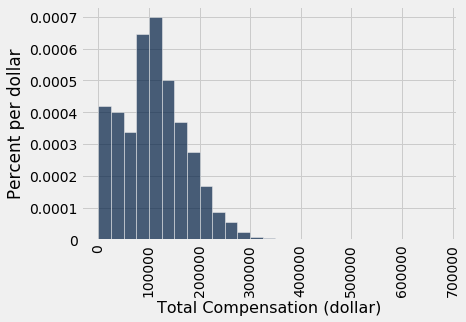

In [4]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins = comp_bins, unit = 'dollar')

From the histogram above, it seems that the greatest density of the incomes are around 100k. 

Below we have the functions necessary to construct the `bootstrap_ci_mean`,

In [5]:
def bootstrap_mean(sample_from_population, label, repetitions):
    """ Returns a list of resampled mean.
    sample_from_population: An original sample taken from the population
    label: the label within the sample table that we want to bootstrap
    repetitions: the number of repetition
    
    """
    resampled_mean = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        # Below we use np.mean
        resampled_mean.append(np.mean(resample.column(label)))
    return resampled_mean

In [6]:
def bootstrap_ci_mean(sample_from_population, label, repetitions):
    # Use the `bootstrap_mean` method and store the values in the list "resampled_means"
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    # Compute the left 2.5% and right 2.5% cutoffs
    interval_95 = make_array(
        percentile(2.5, resampled_means),
        percentile(97.5, resampled_means)
    )
    
    #Construct the histogram and the 95% Confidence Interval horizontal line
    Table().with_column('Resampled mean', resampled_means).hist('Resampled mean')
    plt.plot(interval_95, [0, 0], color = 'gold', lw = 8)
    print('Approximate 95% Bootstrap Confidence Interval for the Population Mean:')
    print(np.round(interval_95, 3))
    print('Width of interval is:')
    print(percentile(97.5, resampled_means) - percentile(2.5, resampled_means))

### How big of a sample do we need to obtain so that the confidence interval is 10k wide?

### The goal is to create a confidence interval that's 10k wide. 
Let's try to make a random confidence interval and see what we obtain. Below we take a sample of size `200`,

In [7]:
sf_sample = sf.sample(200)
sf_sample.show(3)

And below we call the `bootstrap_ci_mean` function with `1,000` repetitions,

Approximate 95% Bootstrap Confidence Interval for the Population Mean:
[102037.132 117596.043]
Width of interval is:
15558.911099999998


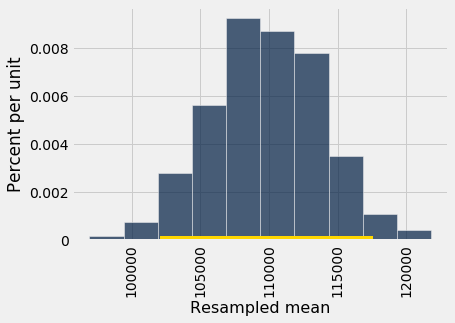

In [8]:
bootstrap_ci_mean(sf_sample, 'Total Compensation', 1000)

**Why does the width matter? **

If the confidence interval is very narrow, we can say, "the population average income is probably within that range". This means we have a good estimation of the population average income. 

On the other hand, if the interval is from 0 to 1 million, the interval is so wide that we can't have a good estimation. 

**As the sample size increases, the distribution of the sample `mean` gets smaller.**

Notice that the histogram above is a histogram of **resampled means**. **Central Limit Theorem** says that if we take bunch of samples, take the `mean` of each sample and plot them on a histogram, we will obtain a bell shape curve with a specific `SD` that decreases as the sample size increases. The process of taking samples and analyzing them on a histogram is the same as doing a bootstrap confidence interval. 

In addition, notice that the shape of the histogram above looks like a bell shape. This is because the **Central Limit Theorem** applies to the histogram. The confidence interval takes 95% middle of the data above, in which this 95% happened to be the `mean` of the distribution $\pm$ 2 `SD`.

With a sample size `200`, the width of the interval is still above 10K! Our goal is to obtain a width of 10k or less. 

### What should the sample size be to obtain width of 10k?

According to the formula,
\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

as the sample size increases, `SD` decreases according to $\frac{1}{\sqrt{n}}$. This means if we double the sample size, `SD` will decreases by a factor of $\sqrt{2}$. If we quadruple the sample size, `SD` will decreases by half of the previous. 
Thus, if we quadruple the sample size, 

Approximate 95% Bootstrap Confidence Interval for the Population Mean:
[103897.704 112684.364]
Width of interval is:
8786.65988750002


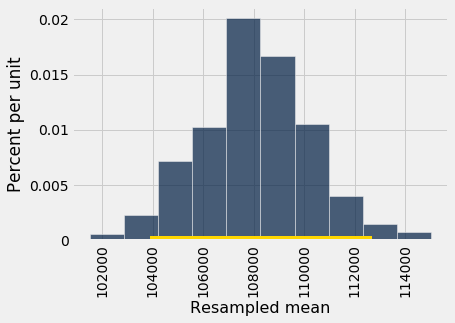

In [9]:
sf_sample = sf.sample(800)
bootstrap_ci_mean(sf_sample, 'Total Compensation', 1000)

As we can see, the width of the 95% confidence interval above is about half of when the sample size is `200`. 

**The easy answer for this question** is to just take a sample size of 1 million to make a really small confidence interval. For a less tedious answer, we can double or quadruple the sample size so that the confidence interval gets smaller. 

As the sample size increases, the `SD` of the distribution decreases and thus, the interval becomes more narrow. With this, we can use sample size to adjust the width of the confidence interval. Generally in real world, we want to just take a sample as large as possible so that it gives us smaller confidence interval. 

However, sometimes we want to ask beforehand, "if we don't want the confidence interval to be too wide, if we want the width to be in a specific range, how large of a sample do we need to obtain?".

Using the method above, we can be,
1. "We want the sample size to be `this` big"
2. "So that the confidence interval is about `this` big"
3. We can go from there, do our study, obtain the results, and
4. Obtain a confidence interval that's as large as we desired

If we want to obtain the exact sample size to obtain an interval of width 10k, we can play around with the code with varying `sample size`. We could have calculated mathematically the `mean` $\pm$ 2`SD` and solve how much the `SD` is, but in this case it is easier to just vary the `sample size` within the code. 

Unfortunately, we won't be able to calculate the "correct" sample size exactly. If we try to calculate exactly the `SD` and say, "the `SD` is `this` much" and divide it with the `sample size`, depending on how the sample comes, the bootstrap confidence interval also varies. Our confidence interval won't be exactly the same every time we execute the code. 

Approximate 95% Bootstrap Confidence Interval for the Population Mean:
[104112.418 112487.073]
Width of interval is:
8374.654412500007


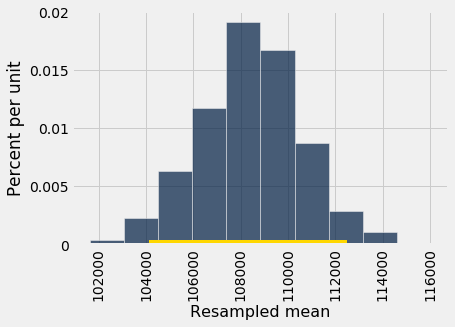

In [10]:
sf_sample = sf.sample(800)
bootstrap_ci_mean(sf_sample, 'Total Compensation', 1000)

See above that the width above is not exactly the same as the previous histogram. We won't be able to find a sample size that gives a width of exactly 10k. We can only find a sample size that gives a width of **around** 10k. 

### So, what can we do?
Let's recap for a bit.

# Choosing a Sample Size
## Width of 95% Confidence Interval

Since we are looking at `sample mean`s, **Central Limit Theorem** says that the distribution of a `sample mean` is roughly normal, **centered at population mean**. We have seen this example before with the `united` flight delays. Even though the population distribution looks nothing like a bell curve (see the following) ,

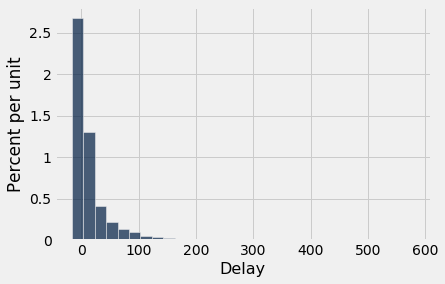

In [11]:
united = Table.read_table('united_summer2015.csv')
united.hist('Delay', bins = 30)

Even with a population distribution that looks like above, if we are analyzing **sample means** and the sample size is large enough then the distribution is **normally distributed**. Recall that as we increase the sample size, the histogram goes from one that looks like the population (see below, `sample size = 1`),

In [12]:
def sample_means(sample_size):
    means = []
    for i in np.arange(1000):
        sample = united.select('Delay').sample(sample_size)
        means.append(np.mean(sample.column('Delay')))
    return means

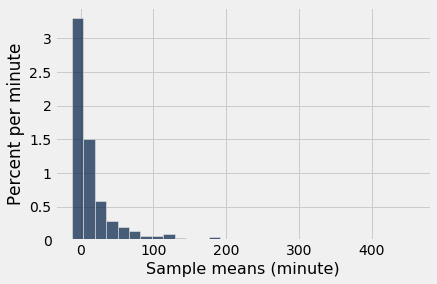

In [13]:
Table().with_column('Sample means', sample_means(1)).hist(bins = 30, unit = 'minute')

To a distribution that looks roughly normal (see below),

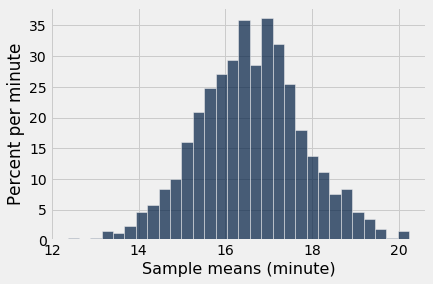

In [14]:
Table().with_column('Sample means', sample_means(1000)).hist(bins = 30, unit = 'minute')

Thus, the **CLT** holds because we are analyzing `sample mean`.

Our 95% confidence interval is **the center $\pm$ 2 `SD` of the sample mean**. If we want a 95% confidence interval, we want an interval that contains 95% of the total area. 

Earlier we just bootstrap and find the 95%. Another way of doing the same thing is,
1. We're looking at the sample average $\pm$ 2 `SD` of the sample mean`
2. We happen to know that the `SD` of the sample is,
\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

This means we can adjust the sample size to obtain a smaller or wider interval. 
3. The total width of the interval is roughly 4 `SD` of the sample mean

## Problems
However, there are also problems. 

The first major problem is that **we have to take a sample before we can decide how large of a sample we need**.

Earlier, we want to know the sample size to obtain interval with width 10k or less. The problem is that we had to take a sample first (recall we took one with size `200`). From there we can say, "we need to quadruple the sample size". This means we need to go out again and take another sample of `800`. 

Unfortunately this is not a good practice. We want to avoid taking sample that that we don't know about in the first place. We want to be able to say, "before we do any sampling, we need a sample of `this` size". 

In addition, **we aren't guaranteed that our interval will be as narrow as we want**. 

Recall when we did the bootstrap, the interval and the `SD` varies every time we execute the code. Thus, it's difficult to obtain an interval that's exactly 10k. 

### Can we address this issue? 

## Discussion Question 5
We want to estimate what % of voters will vote for Candidate A in an upcoming election. How many opinions should we sample at random in order to obtain a 95% confidence interval with a width of 3% or less?

This time, we're asking of proportion instead of dollar amount. It turns out when we ask for proportions, it is solvable. 

Below we have a potential population of votes.

In [15]:
votes = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
np.std(votes)

0.3

Suppose in our population, 9 people voted for candidate A (indicated by `1`) and 1 person did not (indicated by `0`). If we sample from this population, we will obtain roughly 90% of people voting for candidate A. 

Earlier, we didn't know the population `SD`. If we knew the population `SD`, we can calculate "how wide do we want to go to obtain a confidence interval as wide as we desire". 

If we want the width to be 3%, we know that our confidence interval is the `mean` $\pm$ 2 `SD`. The total width of the interval is 4 `SD` (2 on each side). Thus, if we want the width (which is 4 $\times$ `SD`) to be less than or equal to 3%, the `SD` of the sample mean (or in this case, sample proportion) is, once again

\begin{equation*}
sample`mean`SD = \frac{population`SD}{\sqrt{sample`size}}
\end{equation*}

Plug in the numbers, we obtain, 
\begin{equation*}
{\frac{4 \times population`SD}{\sqrt{sample`size}} \le 0.03}
\end{equation*}

If we want to solve for `sample size`, we can rearrange the equation, 

\begin{equation*}
sample`size \ge (\frac{4 \times population`SD}{0.03})^2
\end{equation*}

If we can find the right hand quantity, we can solve for the sample size.

### What is the population `SD`?
We know that the confidence interval will have a width of 4 `SD`. We also know that the width should be 3%. However, we don't know the `SD` of the population. **Actually, we don't have to know the population `SD`.** We can say, "the `SD` will always be some number `x` or less". Let's find out if we can obtain the upper bound of the `SD`.

In [16]:
votes

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

We have the population above. We want to figure out how large the population `SD` can be. It seems that there's some limit on how large the `SD` can be. In the case of San Francisco Public Workers dataset, the data involved huge numbers such as 100k, 50k, and 30k. Thus, the `SD` can be large (e.g. 60k)

In this case, our dataset only consists of `1` and `0`. This important fact allows us to infer that the population `SD` wouldn't be greater than some number. 

What happens if we change the `0` within `votes` to `1`?

In [17]:
votes = [1] * 10
votes

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [18]:
np.std(votes)

0.0

The `SD` becomes `0`! This makes sense, if our data is all the same, then there will be no variation. This way, `SD` should be `0`. 

Now what if 4 out of the 10 people in `votes` didn't vote for candidate A?

In [19]:
votes = [1] * 6 + [0] * 4
votes

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [20]:
np.std(votes)

0.4898979485566356

Now our `SD` is about 0.49! What if half of the `votes` didn't vote for candiadate `A`?

In [21]:
votes = [1] * 5 + [0] * 5

In [22]:
np.std(votes)

0.5

Then the `SD` would be `0.5`!

We can create a function `sd_voters` that takes in a number of voters that will vote candidate A among `10` candidates, and does 2 things:
1. Prints the total votes
2. Returns the `SD`

In [23]:
total_voters = 10

def sd_voters(n_voters_for_a):
    votes = np.append(np.ones(n_voters_for_a), np.zeros(total_voters - n_voters_for_a))
    print(votes)
    return np.std(votes)

In [24]:
sd_voters(4)

[1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


0.48989794855663565

Let's make it interactive using `interact` function,

In [25]:
_ = interact(sd_voters, n_voters_for_a = np.arange(1, 11) )

interactive(children=(Dropdown(description='n_voters_for_a', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1)…

Notice that if we change the `n_voters_for_a` to `4`, `5`, and `6`, the `SD` initially goes up when `n` is `5`, then goes back down when `n` is `6`! 

This is an interesting fact that if the data contains only `0`s and `1`s, the `SD` of the data will never be greater than `0.5`. Knowing this, we can just use the `0.5` and plan for the worst case. When we make a confidence interval, the interval depends on how large the `SD` is. If the `SD` is really large, the confidence interval would be really wide. However, if we know that the confidence interval would be some number between `0` and `0.5`, we can treat the `SD` as `0.5`. If it turns out that the `SD` is less than `0.5`,  then the **correct interval** should be still within the interval where the `SD` is 0.5.

If the data is anything other than just `0`s and `1`s, the `SD` can be anything. However, **if the data consists of only `0` and `1`, the `SD` will never be greater than `0.5`!**

Now we know that the "worst" `SD` is `0.5`. We want the width in `SD` to be less than `0.03.`Our confidence interval is `4 SD` wide, and **the goal is to have this number to be less than `0.03`**. 

Going back to the formula,

\begin{equation*}
sample`size \ge (\frac{4 \times population`SD}{0.03})^2
\end{equation*}

Now that we know that the `population SD` will never be greater than `0.5`, we can plug in `0.5` for the `population SD`. Even if it turns out the `population SD` is less than `0.5`, the inequality $\ge$ still holds. This is because if we make the RHS (right hand side) smaller, the LHS (left hand side) is still greater than the RHS.

In [26]:
worst_sd_pop = 0.5 # worst population SD
width_in_sds = 4 # Width of confidence interval
desired_width = 0.03 #

Thus, the sample size is,

In [27]:
(width_in_sds * worst_sd_pop / desired_width) ** 2

4444.444444444445

Above is the required sample size to obtain width of `SD` of at least `0.03` or smaller. This is saying that no matter what the population looks like, if we take a sample of `4445`, our confidence interval will always be `0.03` or less. This is because population `SD` will never be greater than `0.5`. 

Suppose we have a table called `voters` that contains the following,

In [28]:
voters = Table().with_columns(
    'Candidate', ['A', 'B'],
    'Chance', [0.6, 0.4]
)

In [29]:
voters

Candidate | Chance
A         | 0.6
B         | 0.4

And suppose we don't know the `Chance`, so we only know the `Candidate`s,

In [30]:
voters.select(0)

Candidate
A
B

We (supposedly) don't know the the proportion of votes teach candidate has. We want a confidence interval for the proportion of voters with a width of 3% or less. Below we take a sample with size of `4445` of the votes, 

In [31]:
n = 4445 # The calculated sample size
observed_sample = voters.select(0).sample(n, weights = voters.column('Chance'))
observed_sample.show(3)

Now let's take the proportion of people who voted for A and bootstrap that.

In [32]:
means = []
for i in np.arange(1000):
    resample = observed_sample.sample()
    # Counts the proportion of `A` in the 'resample' and append it to the `means` array
    means.append(np.count_nonzero(resample.column(0) == 'A') / n)

Now let's take the 95% confidence interval by taking the difference between the `97.5%` percentile and the `2.5%` percentile,

In [33]:
print(percentile(97.5, means) - percentile(2.5, means))

0.027896512935883022


And indeed! The width is somewhere close to 0.03!